# Figure S14: Comparisons of all model-based parameters between intact and dStr-lesioned rats

## setup and imports

In [1]:
import fnmatch
import matplotlib.pyplot as plt
import numpy as np
import glob

from sessionlists import (dist60, dist90, dist120, TM20, TM10, TM2, TMrev2, TMrev10, TMrev20)
from utils import *
from plotting import *
from model_functions import *

plt.style.use('./Figures/paper.mplstyle')

In [2]:
# Define folder with data
root = "/home/thomas/Desktop/ALLDATA"

print("Path to data is: %s"%root)
print(f'Found {len(glob.glob(root+"/*"))} rats in the data folder')

Path to data is: /home/thomas/Desktop/ALLDATA
Found 34 rats in the data folder


In [3]:
rat_markers = {}
sequence = {}
params = {}

animalList = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 
              'RatF30', 'RatF31', 'RatF32', 'RatF33', 'RatM30', 'RatM31', 'RatM32', 
              'RatF40', 'RatF41', 'RatF42', 'RatM40', 'RatM41', 'RatM42', 'RatM43', 
                'RatF50', 'RatF51', 'RatF52', 'RatM50', 'RatM51', 'RatM52', 'RatM53', 'RatM54']

intact_rats = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 
                    'RatF32', 'RatF33', 'RatM31', 'RatM32', 'RatF42', 'RatM40', 'RatM43', 'RatM53', 'RatM54']

lesioned_rats = ['RatF30', 'RatF31', 'RatM30', 'RatF40', 'RatF41', 'RatM41', 'RatM42',
            'RatF50', 'RatF51', 'RatF52', 'RatM50', 'RatM51', 'RatM52']


m, f, l = 0, 0, 0
male_palette = create_teal_palette(num_shades=len([x for x in intact_rats if 'M' in x]))
female_palette = create_blue_violet_palette(num_shades=len([x for x in intact_rats if 'F' in x]), start_intensity=80)
palette = create_kiwi_green_palette(num_shades=len(lesioned_rats))
for index, animal in enumerate(intact_rats):
    if fnmatch.fnmatch(animal, 'RatF*'):
        rat_markers[animal]=[female_palette[f], 'o', '-']
        f += 1
    elif fnmatch.fnmatch(animal, 'RatM*'):
        rat_markers[animal]=[male_palette[m], 'o', '-']
        m += 1
    elif fnmatch.fnmatch(animal, 'Rat00*'):
        rat_markers[animal]=[(0.0, 0.0, 0.0), "$\u2426$",]
    else:
        print("error, this is not a rat you got here")
    for session in sorted(matchsession(animal, dist60+dist90+dist120 + TM20+TM10+TM2+TMrev2+TMrev10+TMrev20)):
        sequence[animal, session] = get_from_pickle(root, animal[0:6], session, name="sequence.p")

for index, animal in enumerate(lesioned_rats):
    if fnmatch.fnmatch(animal, 'Rat*'):
        rat_markers[animal]=[palette[l], 'o']
        l += 1
    elif fnmatch.fnmatch(animal, 'Rat00*'):
        rat_markers[animal]=[(0.0, 0.0, 0.0), "$\u2426$",]
    else:
        print("error, this is not a rat you got here")

    for session in sorted(matchsession(animal, dist60+dist90+dist120 + TM20+TM10+TM2+TMrev2+TMrev10+TMrev20)):
        sequence[animal, session] = get_from_pickle(root, animal[0:6], session, name="sequence.p")

In [4]:
# load the model fits
alpha_0, alpha_t, alpha_u, gamma_0, gamma_t, gamma_u, mu_0, mu_t, mu_u, sigma_0, sigma_t, sigma_u = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))

conds = ['60', '90', '120', '20', '10', '2', 'rev10', 'rev20']
vars = [alpha_0, alpha_t, alpha_u, gamma_0, gamma_t, gamma_u, mu_0, mu_t, mu_u, sigma_0, sigma_t, sigma_u]
names = ['alpha_0', 'alpha_t', 'alpha_u', 'gamma_0', 'gamma_t', 'gamma_u', 'mu_0', 'mu_t', 'mu_u', 'sigma_0', 'sigma_t', 'sigma_u']


In [5]:
# Manual ylims, yticks and ylabels for each variable
lims = {'alpha_0': [0, 1, 2, 3],
        'alpha_t': [-0.1, 0, .1, .2, .3, .4, .5],
        'alpha_u': [-0.6, -0.4, -0.2, 0, 0.2, 0.4],
        'gamma_0': [0, 0.5, 1, 1.5, 2],
        'gamma_t': [-0.2, -.1, 0, 0.1],
        'gamma_u': [-.6, -.4, -.2, 0, .2],
        'mu_0': [.5, 1, 1.5, 2, 2.5],
        'mu_t': [0, 0.05, .1, .15, .2, ],
        'mu_u': [-.1, 0.0, .1, .2],
        'sigma_0': [0, .05, .1, .15, .2, .25],
        'sigma_t': [-.05, -.025, 0, .025, 0.05],
        'sigma_u': [-.03, 0, .03, .06, .09, .12], 
        'runspeed': [20, 40, 60, 80, 100, ]}

difflims = {'alpha_0': [-0.6, -0.3, 0, 0.3, 0.6],
        'alpha_t': [-0.1, -0.05, 0, 0.05, .1],
        'alpha_u': [-0.2, -0.1, 0, 0.1, 0.2],
        'gamma_0': [-0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3],
        'gamma_t': [-0.04, -.02, 0, 0.02, 0.04],
        'gamma_u': [-.2, -.1, 0, .1, .2],
        'mu_0': [-0.4, -.2, 0, 0.2, 0.4],
        'mu_t': [-0.04, -0.02, 0, 0.02, 0.04],
        'mu_u': [-0.04, -0.02, 0, 0.02, 0.04],
        'sigma_0': [-0.04, -0.02, 0, 0.02, 0.04],
        'sigma_t': [-0.02, -0.01, 0, 0.01, 0.02],
        'sigma_u': [-0.02, -0.01, 0, 0.01, 0.02], 
        'runspeed': [-20, -10, 0, 10, 20]}

labels = {'alpha_0': r'$\alpha_0$', 'alpha_t': r"$\alpha_t$", 'alpha_u': r"$\alpha_u$",
          'gamma_0': r'$\gamma_0$', 'gamma_t': r"$\gamma_t$", 'gamma_u': r"$\gamma_u$",
          'mu_0': r'$\mu_0$', 'mu_t': r"$\mu_t$", 'mu_u': r"$\mu_u$",
          'sigma_0': r'$\sigma_0$', 'sigma_t': r"$\sigma_t$", 'sigma_u': r"$\sigma_u$", 
          'runspeed': "Run speed (cm/s)"}


# S14A difference intact vs. lesion for α0, αt, αu, γ0, γt and γu across the 8 action costs 
# S14B Same as S14A, for μ0, μt, μu, σ0, σt and σu

[0.8521 0.5725 0.5057 0.3224 0.0028 0.1667 0.0642 0.0198]


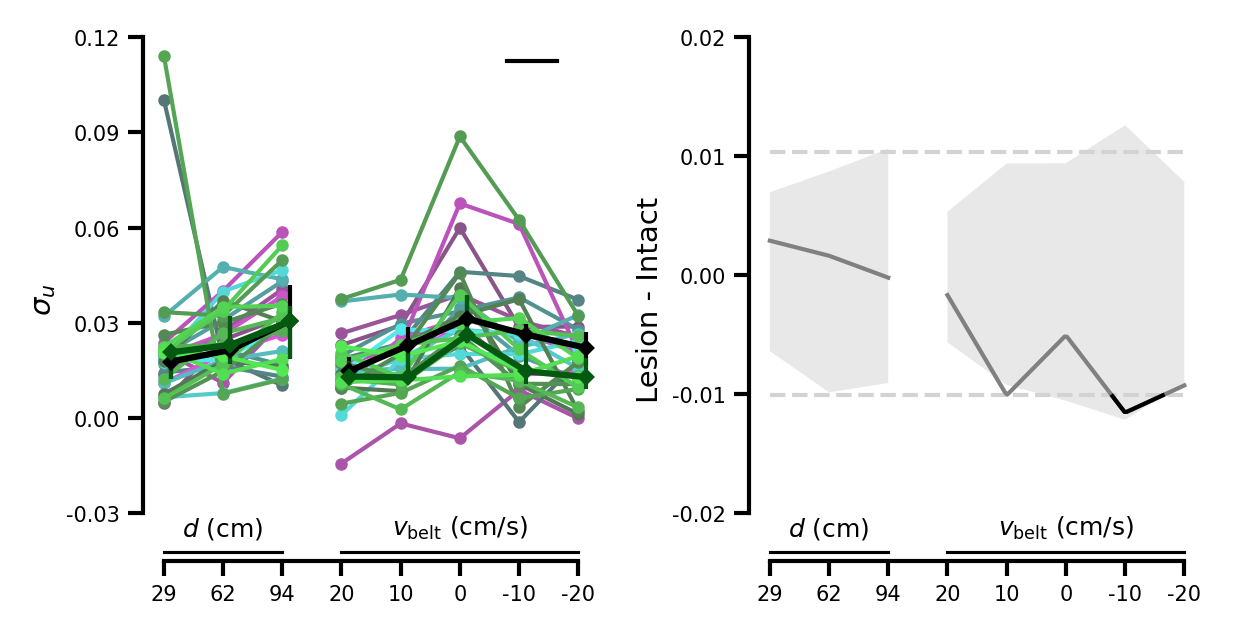

In [10]:
def FigureS14AB(var, name='', ax=None, ax_stat=None):
    if ax is None or ax_stat is None:
        fig, (ax, ax_stat) = plt.subplots(1, 2, figsize=(4, 2))
    conds = ['60', '90', '120', '20', '10', '2', 'rev10', 'rev20']
    intact = []
    lesion = []
    for animal in intact_rats:
        ax.plot([0, 1, 2], [var[animal][cond] for cond in ['60', '90', '120']], color=rat_markers[animal][0], 
                marker=rat_markers[animal][1], ms=2)
        ax.plot([3, 4, 5, 6, 7], [var[animal][cond] for cond in ['20', '10', '2', 'rev10', 'rev20']], color=rat_markers[animal][0], 
                marker=rat_markers[animal][1], ms=2)
        intact.append([var[animal][cond] for cond in conds])
    for animal in lesioned_rats:
        ax.plot([0, 1, 2], [var[animal][cond] for cond in ['60', '90', '120']], color=rat_markers[animal][0], 
                marker=rat_markers[animal][1], ms=2)
        ax.plot([3, 4, 5, 6, 7], [var[animal][cond] for cond in ['20', '10', '2', 'rev10', 'rev20']], color=rat_markers[animal][0], 
                marker=rat_markers[animal][1], ms=2)
        lesion.append([var[animal][cond] for cond in conds])

    ngroup1 = len(intact)
    num_permutations = 10000

    median_intact = np.median(intact, axis=0)
    median_lesion = np.median(lesion, axis=0)

    ax.set_ylabel(labels[name])
    ax.set_ylim(lims[name][0], lims[name][-1])
    ax.set_yticks(lims[name])
    ax.set_xlim(0, 7)
    ax.set_xticks(np.arange(8))
    ax.set_xticklabels(["29", "62", "94", "20", "10", "0", "-10", "-20"])
    space_axes(ax, y_ratio=.1, x_ratio_left=.05, x_ratio_right=.05)
    annotation_d_vbelt(ax=ax, miny=lims[name][0])

    observed_diff = median_lesion - median_intact
    permuted_diffs = np.zeros((num_permutations, 8))

    for i in range(num_permutations):
        combined_data = np.concatenate([intact, lesion], axis=0)
        np.random.shuffle(combined_data)

        permuted_diff = np.median(combined_data[:ngroup1], axis=0) - np.median(combined_data[ngroup1:], axis=0)
        permuted_diffs[i] = permuted_diff

    p_values = np.mean(permuted_diffs <= observed_diff, axis=0)

    print(p_values)

    plotmedian(var, ax=ax, dist_or_tm='dist', animalList=intact_rats, err='percentile', color='k')
    plotmedian(var, ax=ax, dist_or_tm='dist', animalList=lesioned_rats, err='percentile', color='xkcd:deep green')
    plotmedian(var, ax=ax, dist_or_tm='tm', animalList=intact_rats, err='percentile', color='k', shift_tm=True)
    plotmedian(var, ax=ax, dist_or_tm='tm', animalList=lesioned_rats, err='percentile', color='xkcd:deep green', shift_tm=True)




    alpha = 100 # Global alpha value
    highGlobCI = 2.5
    lowGlobCI = 2.5
    while alpha >= 5:
        highBand = np.percentile(a=permuted_diffs, q=100-highGlobCI)
        lowBand = np.percentile(a=permuted_diffs, q=lowGlobCI)

        breaksPositive = np.sum([np.sum(permuted_diffs[i, :] > highBand) > 1 for i in range(len(permuted_diffs))])
        breaksNegative = np.sum([np.sum(permuted_diffs[i, :] < lowBand) > 1 for i in range(len(permuted_diffs))])
        
        alpha = ((breaksPositive + breaksNegative) / len(permuted_diffs)) * 100
        highGlobCI = 0.95 * highGlobCI
        lowGlobCI = 0.95 * lowGlobCI
    
    ax_stat.plot(range(8), [lowBand for _ in range(8)], color='lightgray', ls='--', label='Global 95% CI band')
    ax_stat.plot(range(8), [highBand for _ in range(8)], color='lightgray', ls='--', label='Global 95% CI band')



    ######################################
    CI = np.percentile(permuted_diffs[:, :], [2.5, 97.5], axis=0)
    y = np.concatenate([CI[0][0:3], CI[1][0:3][::-1]])
    x = np.concatenate([[0, 1, 2], [2, 1, 0]])
    ax_stat.fill(x, y, alpha=.5, color='lightgray', label='95% CI', zorder=0, lw=0)

    y = np.concatenate([CI[0][3:8], CI[1][3:8][::-1]])
    x = np.concatenate([[3, 4, 5, 6, 7], [7, 6, 5, 4, 3]])
    ax_stat.fill(x, y, alpha=.5, color='lightgray', label='95% CI', zorder=0, lw=0)

    shift = np.sqrt(np.sum((lims[name][0] - lims[name][-1]) ** 2, axis=0)) * 0.95 + lims[name][0]
    for x, y in zip([[0, 1, 2], [3, 4, 5, 6, 7]], [observed_diff[0:3], observed_diff[3:8]]):
        f = interp1d(x, y, kind='linear')
        xnew = np.linspace(x[0], x[-1], num=100, endpoint=True)
        ynew = f(xnew)
        # ax.plot(xnew, ynew*0+2.2, color='gray', zorder=8)
        #only plot y above highband
        y_filtered = ynew[ynew > highBand]
        x_filtered = xnew[ynew > highBand]
        ax.plot(x_filtered, y_filtered*0+shift, color='k', zorder=10, label='Significant difference')
        ax_stat.plot(xnew, ynew, color='gray', zorder=8)
        ax_stat.plot(x_filtered, y_filtered, color='k', zorder=10, label='Significant difference')
        # plot below lowband
        y_filtered = ynew[ynew < lowBand]
        x_filtered = xnew[ynew < lowBand]
        ax.plot(x_filtered, y_filtered*0+shift, color='k', zorder=10)
        ax_stat.plot(x_filtered, y_filtered, color='k', zorder=10)


    ax_stat.set_ylim(difflims[name][0], difflims[name][-1])
    ax_stat.set_ylabel('Lesion - Intact')
    ax_stat.set_yticks(difflims[name])
    ax_stat.set_xlim(0, 7)
    ax_stat.set_xticks(np.arange(8))
    ax_stat.set_xticklabels(["29", "62", "94", "20", "10", "0", "-10", "-20"])

    space_axes(ax_stat, x_ratio_left=.05, x_ratio_right=.05, y_ratio=.1)
    annotation_d_vbelt(ax=ax_stat, miny=difflims[name][0])

    # handles, labels = ax_stat.get_legend_handles_labels()
    # unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]][::-1]
    # ax_stat.legend(*zip(*unique), loc='upper center', bbox_to_anchor=(0.5, 1.05), 
    #                         frameon=True, fontsize=5, markerscale=1, ncol=3,
    #                         edgecolor='k', facecolor='w').get_frame().set_linewidth(.5)

FigureS14AB(sigma_u, name='sigma_u')

# Figure S14: Comparisons of all model-based parameters between intact and dStr-lesioned rats.

/home/thomas/Documents/RunningFastAndSlow/.venv/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


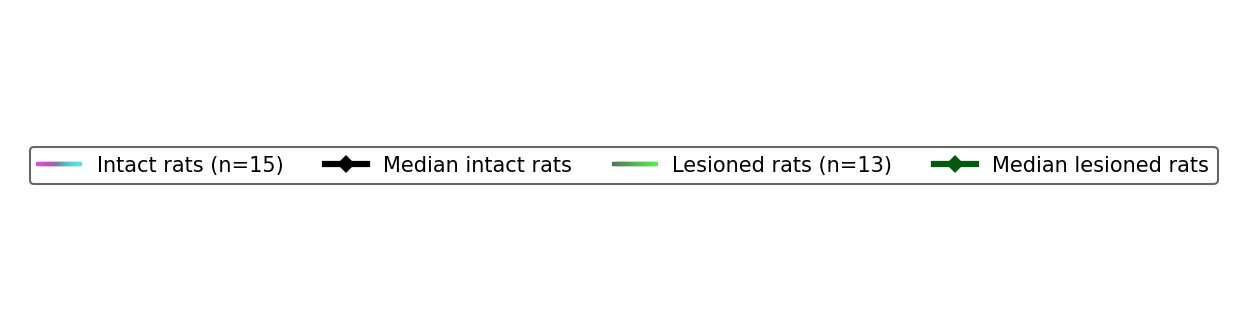

In [7]:
def dummy_legend(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    
    median_intact = ax.plot([-100, -101], [-100, -101], color='k', marker='D', markersize=2, linestyle='-', lw=1.5, label=f'Median intact rats', zorder=5)
    median_lesion = ax.plot([-100, -101], [-100, -101], color='xkcd:deep green', marker='D', markersize=2, linestyle='-', lw=1.5, label=f'Median lesioned rats', zorder=5)
    
    patches = add_colored_lesion(ax=ax, do_return=True)
    add_colored_intact(ax=ax, loc='center', bbox=(.5, .5), ncol=4,
                        handles=[median_intact, *patches, median_lesion],
                        labels=['Median intact rats', f'Lesioned rats (n={len(lesioned_rats)})', 'Median lesioned rats'], 
                        text=f'Intact rats (n={len(intact_rats)})')
    ax.axis('off')
    ax.set_xlim(10, 11)
    ax.set_ylim(10, 11)

fig, axs = plt.subplots(1, 1, figsize=(cm2inch(3), cm2inch(3)))
dummy_legend(ax=axs)

[0.8226 0.662  0.7954 0.92   0.9906 0.7529 0.9651 0.4988]
[0.0028 0.059  0.3263 0.06   0.0941 0.1629 0.0756 0.2098]
[0.3511 0.7893 0.383  0.3296 0.339  0.4144 0.2596 0.6309]
[0.2646 0.5061 0.6609 0.83   0.8997 0.2278 0.3179 0.0902]
[0.7382 0.803  0.9425 0.2269 0.499  0.7647 0.5053 0.1373]
[0.5745 0.6956 0.2017 0.3189 0.2083 0.3823 0.3249 0.7161]
[0.9851 0.8789 0.9395 0.9184 0.9211 0.9956 1.     1.    ]
[0.2162 0.2022 0.4127 0.3165 0.2076 0.2894 0.4971 0.2639]
[0.5817 0.583  0.2953 0.5029 0.843  0.6639 0.7903 0.501 ]
[0.9589 0.6734 0.5832 0.9336 0.8296 0.5753 0.9524 0.9914]
[0.4996 0.3116 0.7808 0.2526 0.0466 0.1268 0.2139 0.2811]
[0.8504 0.5838 0.5001 0.3267 0.0033 0.1692 0.0667 0.0214]


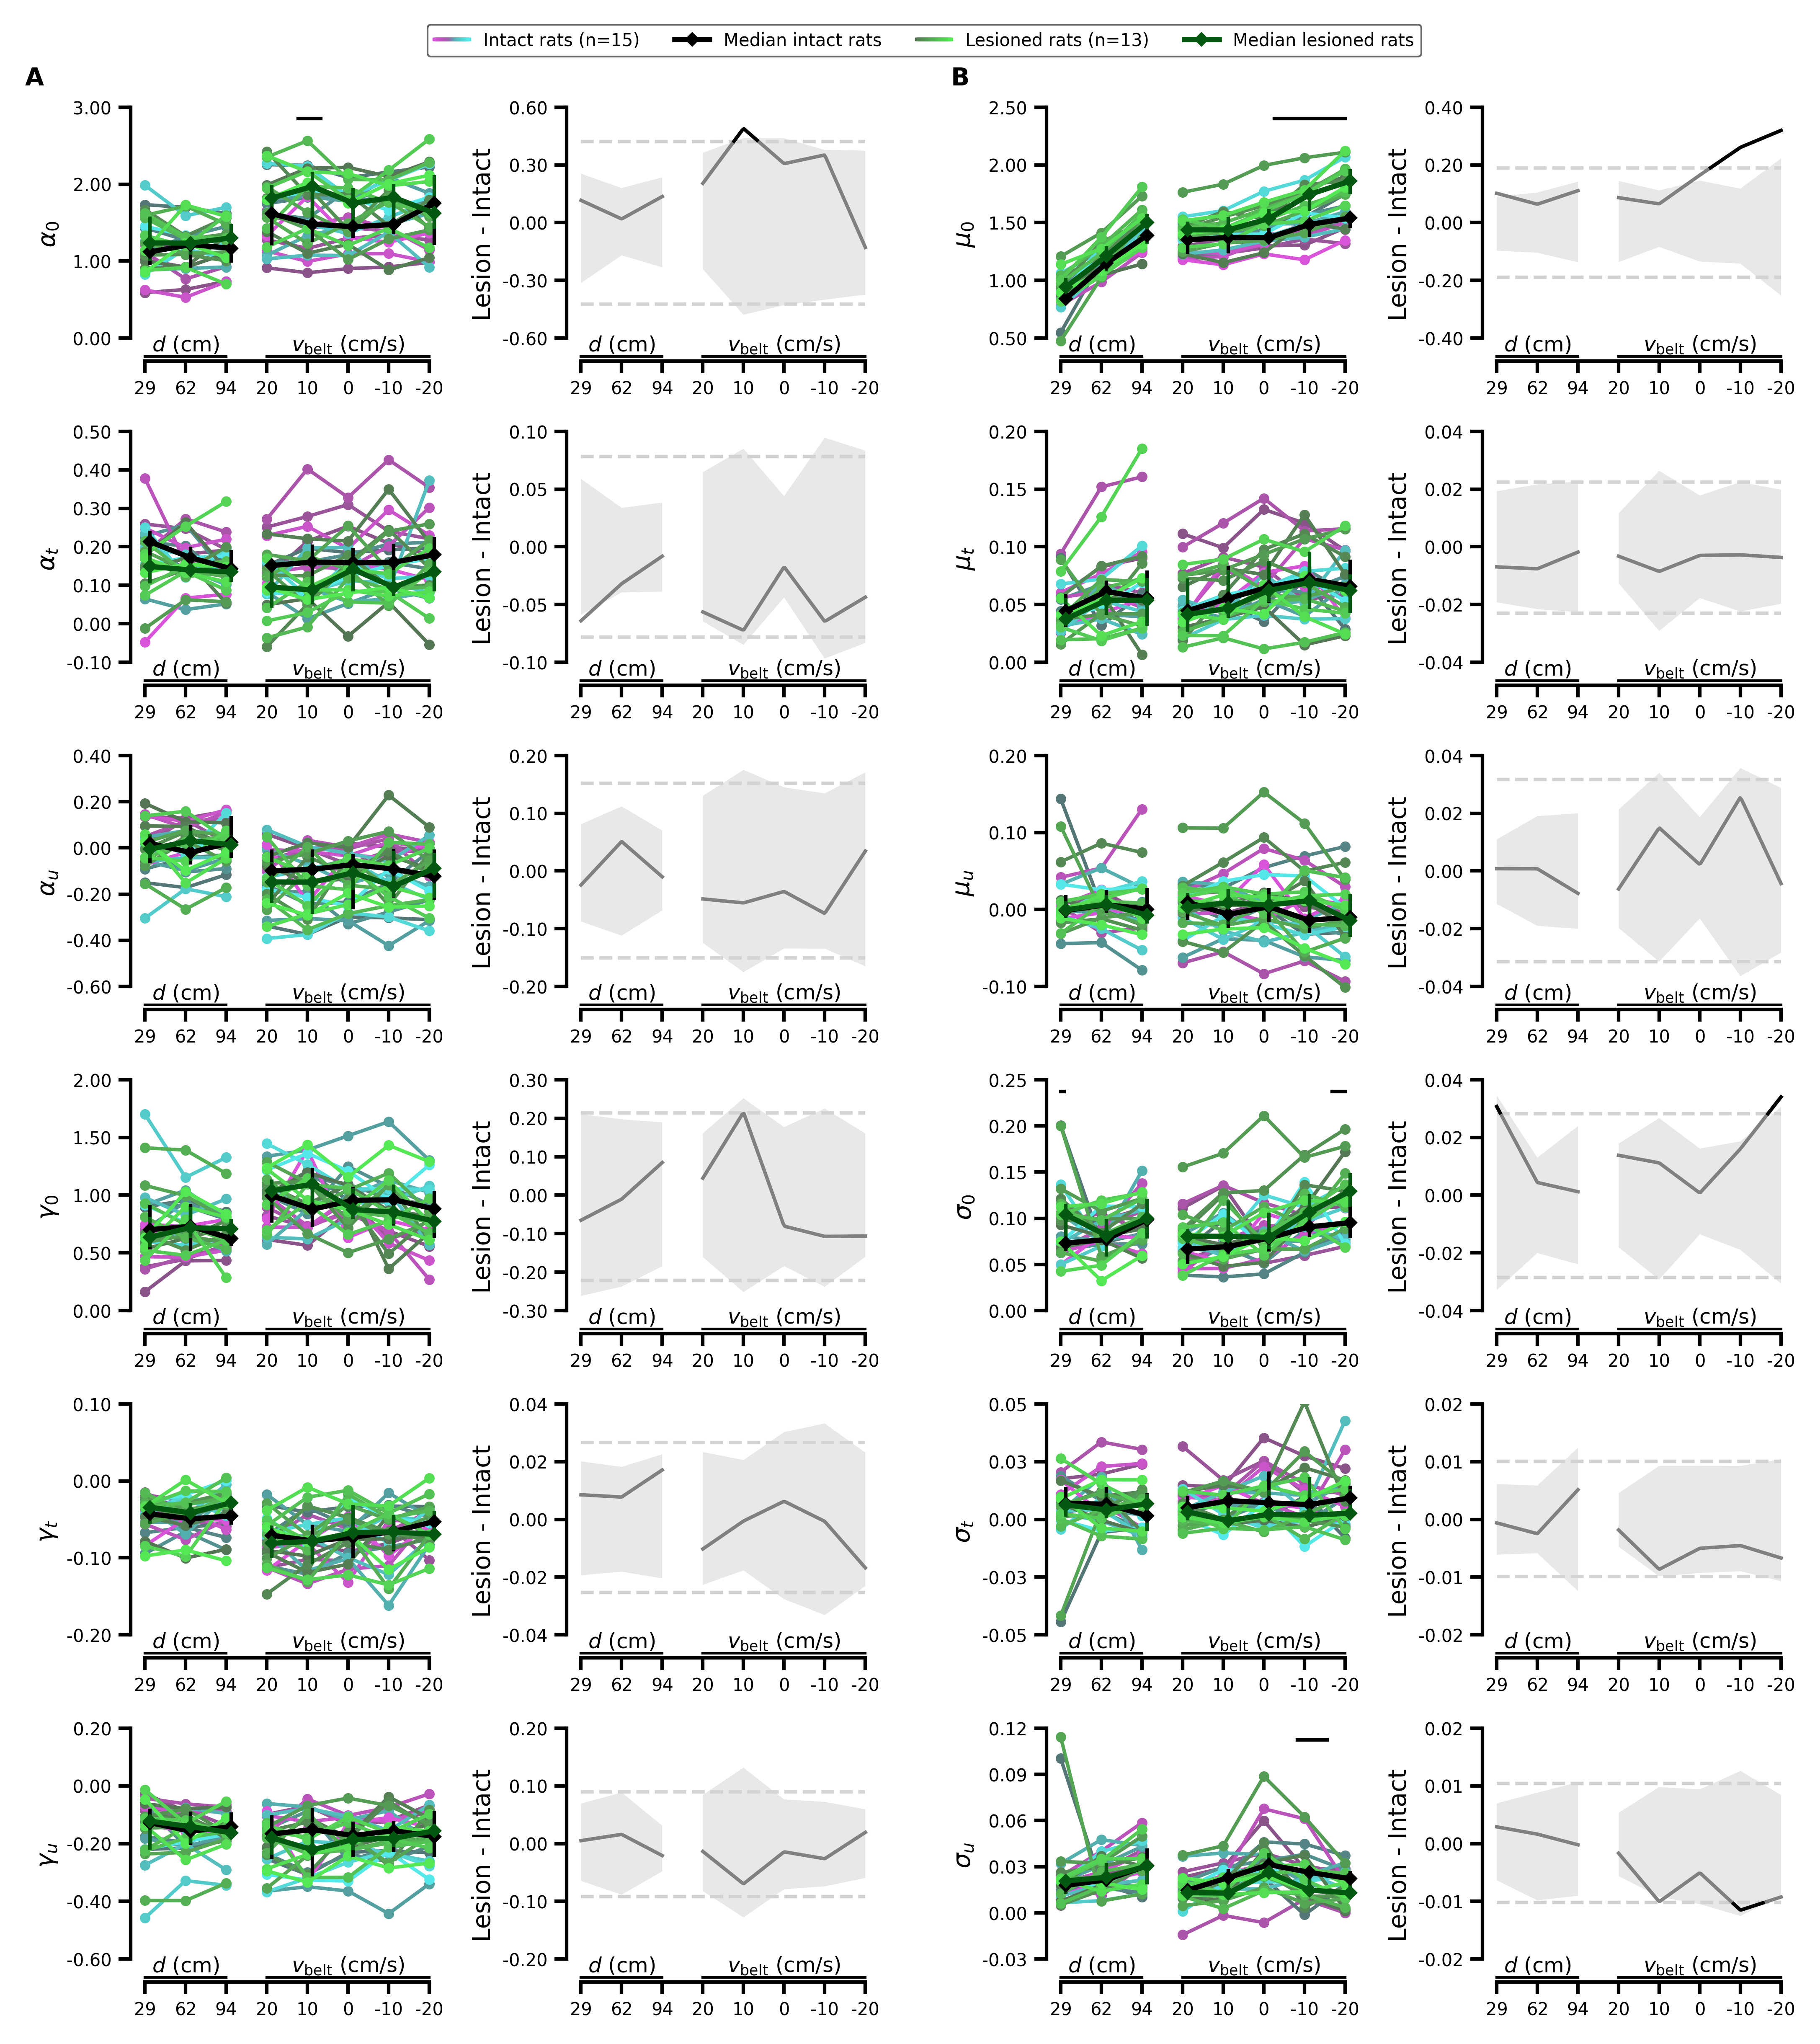

In [11]:
fig=plt.figure(figsize=(cm2inch(18), cm2inch(20)), dpi=600, constrained_layout=True, facecolor='w')

gs0 = fig.add_gridspec(7, 5 , height_ratios=[.05, 1, 1, 1, 1, 1, 1], width_ratios=[1, 1, .05, 1, 1])

ax_alpha_0 = fig.add_subplot(gs0[1, 0])
ax_alpha_0_stats = fig.add_subplot(gs0[1, 1])
ax_alpha_t = fig.add_subplot(gs0[2, 0])
ax_alpha_t_stats = fig.add_subplot(gs0[2, 1])
ax_alpha_u = fig.add_subplot(gs0[3, 0])
ax_alpha_u_stats = fig.add_subplot(gs0[3, 1])

ax_gamma_0 = fig.add_subplot(gs0[4, 0])
ax_gamma_0_stats = fig.add_subplot(gs0[4, 1])
ax_gamma_t = fig.add_subplot(gs0[5, 0])
ax_gamma_t_stats = fig.add_subplot(gs0[5, 1])
ax_gamma_u = fig.add_subplot(gs0[6, 0])
ax_gamma_u_stats = fig.add_subplot(gs0[6, 1])

ax_mu_0 = fig.add_subplot(gs0[1, 3])
ax_mu_0_stats = fig.add_subplot(gs0[1, 4])
ax_mu_t = fig.add_subplot(gs0[2, 3])
ax_mu_t_stats = fig.add_subplot(gs0[2, 4])
ax_mu_u = fig.add_subplot(gs0[3, 3])
ax_mu_u_stats = fig.add_subplot(gs0[3, 4])

ax_sigma_0 = fig.add_subplot(gs0[4, 3])
ax_sigma_0_stats = fig.add_subplot(gs0[4, 4])
ax_sigma_t = fig.add_subplot(gs0[5, 3])
ax_sigma_t_stats = fig.add_subplot(gs0[5, 4])
ax_sigma_u = fig.add_subplot(gs0[6, 3])
ax_sigma_u_stats = fig.add_subplot(gs0[6, 4])


FigureS14AB(alpha_0, 'alpha_0', ax=ax_alpha_0, ax_stat=ax_alpha_0_stats)
FigureS14AB(alpha_t, 'alpha_t', ax=ax_alpha_t, ax_stat=ax_alpha_t_stats)
FigureS14AB(alpha_u, 'alpha_u', ax=ax_alpha_u, ax_stat=ax_alpha_u_stats)
FigureS14AB(gamma_0, 'gamma_0', ax=ax_gamma_0, ax_stat=ax_gamma_0_stats)
FigureS14AB(gamma_t, 'gamma_t', ax=ax_gamma_t, ax_stat=ax_gamma_t_stats)
FigureS14AB(gamma_u, 'gamma_u', ax=ax_gamma_u, ax_stat=ax_gamma_u_stats)

FigureS14AB(mu_0, 'mu_0', ax=ax_mu_0, ax_stat=ax_mu_0_stats)
FigureS14AB(mu_t, 'mu_t', ax=ax_mu_t, ax_stat=ax_mu_t_stats)
FigureS14AB(mu_u, 'mu_u', ax=ax_mu_u, ax_stat=ax_mu_u_stats)
FigureS14AB(sigma_0, 'sigma_0', ax=ax_sigma_0, ax_stat=ax_sigma_0_stats)
FigureS14AB(sigma_t, 'sigma_t', ax=ax_sigma_t, ax_stat=ax_sigma_t_stats)
FigureS14AB(sigma_u, 'sigma_u', ax=ax_sigma_u, ax_stat=ax_sigma_u_stats)

axes = fig.get_axes()
for ax in axes:
    ax.yaxis.set_major_formatter('{x:>5.2f}')

figuresLabels={"A":[0.0, .98], "B":[0.52, .98]}

for label,coordinates in sorted(figuresLabels.items()):
    fig.text(coordinates[0], coordinates[1], label, figure=fig, 
            weight='bold', fontsize=7, ha='left', va='bottom')


legend = fig.add_axes([.5, 1., .01, .01])
dummy_legend(ax=legend)


plt.savefig("./Figures_paper/Figure_S14.pdf", facecolor='w', 
            edgecolor='none', bbox_inches='tight', format="pdf", dpi=600)

plt.savefig("./Figures_paper/Figure_S14.svg", facecolor='w', 
            edgecolor='none', bbox_inches='tight', format="svg", dpi=600)